# Phishing URL Detection

## Introduction

### Relevant Background Info

Phishing is a cybercrime that baits unknowing victims into clicking on URLs. This is done by acting like an authentic institution while contacting the victim through emails, texts, or other social media. Phishing assaults nowadays are advanced and progressively more troublesome to spot; additionally, as we rely more on our online profiles, phishing emails that take our sensitive information become more and more dangerous. Not only are phishing assaults dangerous to individuals, but they are also dangerous to huge corporations. For instance, one of the most extraordinary Phishing attacks includes the Colonial Pipeline scam, where over 3.4 billion euros were scammed out of the company. The attack was constructed by a simple email which gained access to passwords and planted malicious software onto the company network system. This caused the company to shut down and the oil prices to skyrocket. The seriousness and dangers of phishing can lead to extreme damage and have tragic consequences, so more sophisticated methods of systems are required to prevent phishing. To counteract the dangers of phishing, our group will classify URLs as 'phishing' or 'legitimate' to warn victims before the attackers steal their sensitive information.

### Predictive Question

What attributes are the most important in classifying whether an URL is phishing or legitimate?

### Dataset

The dataset used in this project comes from: https://data.mendeley.com/datasets/c2gw7fy2j4/3/files/575316f4-ee1d-453e-a04f-7b950915b61b <br>
The dataset is used by the article <i><a href="https://www.sciencedirect.com/science/article/pii/S0952197621001950#">Towards benchmark datasets for machine learning based website phishing detection: An experimental study</a></i> which can be found on the <i><a href="https://www.sciencedirect.com/journal/engineering-applications-of-artificial-intelligence">Engineering Applications of Artificial Intelligence journal</a></i>.

## Preliminary Exploratory Data Analysis

Loading necessary libraries.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Reading the Data

As there is no host that allows us to read the dataset online, we have downloaded the data set, and will be reading it locally (in the Jupyter server).  The credibility of the data above, in the *Dataset* section of this proposal.

In [4]:
options(repr.matrix.max.rows = 5)
phishing_data <- read_csv("data/dataset_phishing.csv")
phishing_data

Rows: 11430 Columns: 89
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): url, status
dbl (87): length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,⋯,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,⋯,0,1,0,45,-1,0,1,1,4,legitimate
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,77,23,1,1,0,0,0,0,0,⋯,1,0,0,77,5767,0,0,1,2,phishing
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,126,50,1,4,1,0,1,2,0,⋯,1,0,0,14,4004,5828815,0,1,0,phishing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,⋯,1,0,0,85,2836,2455493,0,0,4,legitimate
http://174.139.46.123/ap/signin?openid.pape.max_auth_age=0&amp;openid.return_to=https%3A%2F%2Fwww.amazon.co.jp%2F%3Fref_%3Dnav_em_hd_re_signin&amp;openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.assoc_handle=jpflex&amp;openid.mode=checkid_setup&amp;key=a@b.c&amp;openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0&amp;&amp;ref_=nav_em_hd_clc_signin,477,14,1,24,0,1,1,9,0,⋯,1,1,1,0,-1,0,1,1,0,phishing


### Cleaning and Wrangling the Data into a tidy format

The data we have found has satisfied all the rules of being clean:
- Each row is a single observation.
- Each column is a single variable.
- Each value is a single cell (entry in the data frame is not shared)

Therefore, anything we do to the data, such as pivoting wider and pivoting longer, would make the data less clean. Additionally, as the data only comes in one table, we do NOT need to merge the dataset with other ones.

However, we will ***select the important columns*** and ***separate the dataset into a training set and a testing set***.

In [5]:
phishing_imp <- phishing_data |>
                select (url, length_url, length_hostname, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde,
                        nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, http_in_path, https_token, 
                        ratio_digits_url, ratio_digits_host, nb_subdomains,longest_word_host, longest_word_path, avg_words_raw, avg_word_host, 
                        domain_registration_length, status)

phishing_split <- initial_split(phishing_imp, prop = 3/4, strata = status)
phishing_train <- training(phishing_split)
phishing_test <- testing(phishing_split)
phishing_train
phishing_test

url,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,⋯,https_token,ratio_digits_url,ratio_digits_host,nb_subdomains,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,domain_registration_length,status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
http://www.crestonwood.com/router.php,37,19,3,0,0,0,0,0,0,⋯,1,0,0,3,11,6,5.750000,7,45,legitimate
http://www.iracing.com/tracks/gateway-motorsports-park/,55,15,2,2,0,0,0,0,0,⋯,1,0,0,2,7,11,6.333333,5,224,legitimate
http://www.mutuo.it,19,12,2,0,0,0,0,0,0,⋯,1,0,0,2,5,0,4.000000,4,170,legitimate
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,84,18,5,0,1,1,0,0,1,⋯,1,0.02380952,0.0000000,3,10,8,5.166667,6.50,211,phishing
http://174.139.46.123/ap/signin?openid.pape.max_auth_age=0&amp;openid.return_to=https%3A%2F%2Fwww.amazon.co.jp%2F%3Fref_%3Dnav_em_hd_re_signin&amp;openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.assoc_handle=jpflex&amp;openid.mode=checkid_setup&amp;key=a@b.c&amp;openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0&amp;&amp;ref_=nav_em_hd_clc_signin,477,14,24,0,1,1,9,0,9,⋯,1,0.08595388,0.7857143,3,3,12,4.377778,2.75,0,phishing


url,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,⋯,https_token,ratio_digits_url,ratio_digits_host,nb_subdomains,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,domain_registration_length,status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
http://rgipt.ac.in,18,11,2,0,0,0,0,0,0,⋯,1,0.00000000,0,2,5,0,5.000000,5.0,62,legitimate
https://technofizi.net/top-best-mp3-downloader-app-for-android-free-music-download/,83,14,1,9,0,0,0,0,0,⋯,0,0.01204819,0,1,10,10,5.454545,10.0,320,legitimate
https://blog.hubspot.com/marketing/email-open-click-rate-benchmark,66,16,2,4,0,0,0,0,0,⋯,0,0.00000000,0,2,7,9,5.875000,5.5,926,legitimate
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://www.siteglimpse.com/automationalley.com,46,19,3,0,0,0,0,0,0,⋯,1,0,0,3,11,15,8.0,7.0,187,legitimate
http://www.mypublicdomainpictures.com/,38,30,2,0,0,0,0,0,0,⋯,1,0,0,2,22,0,12.5,12.5,85,legitimate


### Data Summary

In [30]:
phishing_table_1 <- phishing_train |>
group_by (status) |>
summarize (n=n())

phishing_table_2 <- phishing_train |>
group_by(status) |>
summarize (mean_of_all_predictors = mean(length_url + length_hostname + nb_dots + nb_hyphens + nb_at + nb_qm + nb_and + nb_or + 
                                         nb_eq + nb_underscore + nb_tilde + nb_percent + nb_slash + nb_star + nb_colon + 
                                         nb_comma + nb_semicolumn + nb_dollar + nb_space + http_in_path + https_token + 
                                         ratio_digits_url + ratio_digits_host + nb_subdomains + longest_word_host + 
                                         longest_word_path + avg_words_raw + avg_word_host + domain_registration_length, 
                                         na.rm = TRUE))

phishing_table <- merge(x = phishing_table_1, y = phishing_table_2, by = "status")
phishing_table

status,n,mean_of_all_predictors
<chr>,<int>,<dbl>
legitimate,4286,725.9518
phishing,4286,522.9230


### Data Visualization

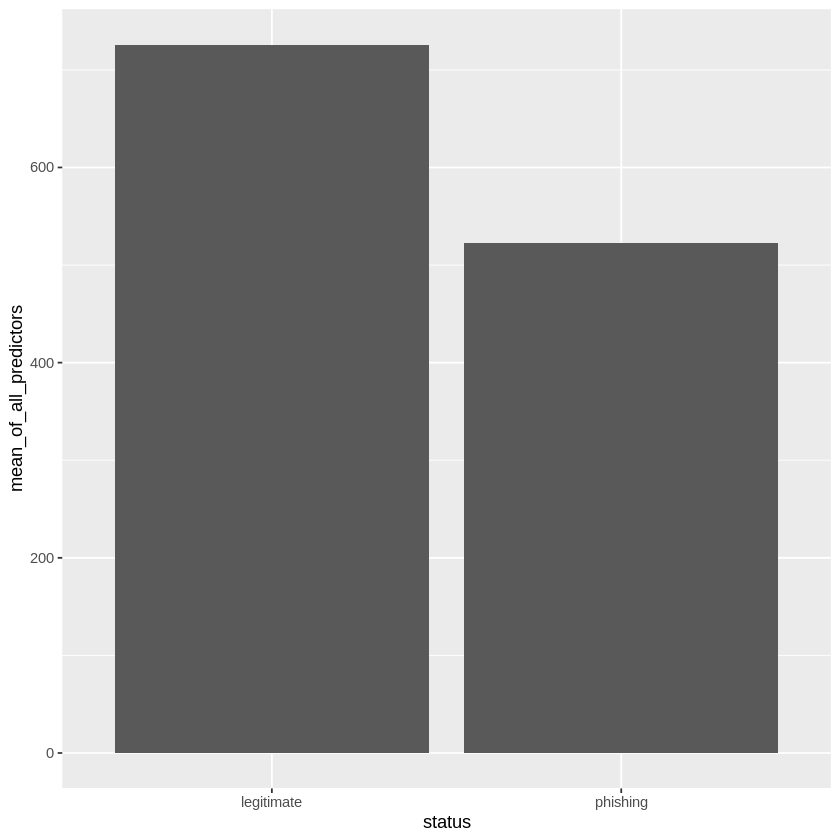

In [49]:
phishing_plot <- phishing_table |>
ggplot (aes (x = status, y = mean_of_all_predictors)) +
geom_bar(stat = "identity")  

phishing_plot

## Methods

### How we will conduct data analysis

To answer the question: *"What attributes are the most important in classifying whether an URL is phishing or legitimate?"* we will be classifying the URLs using the K-nearest neighbours classification technique. To use this type of classification, we have chosen a list of relevant predictors which predict ***status*** (whether it is phishing or legitimate), and we will use **cross-validation** to get an optimal value of K.

Relevant Predictors:
- Length of the URL (length_url)
- Length of the hostname (length_hostname)
- Number of dots (nb_dots)
- Number of hyphens (nb_hyphens)
- Number of @ (nb_at)
- Number of ? (nb_qm)
- Number of & (nb_and)
- Number of | (nb_or)
- Number of = (nb_eq)
- Number of _ (nb_underscore)
- Number of ~ (nb_tilde)
- Number of % (nb_percent)
- Number of / (nb_slash)
- Number of * (nb_star)
- Number of : (nb_colon)
- Number of , (nb_comma)
- Number of ; (nb_semicolumn)
- Number of $ (nb_dollar)
- Number of spaces (nb_space)
- HTTP in path (http_in_path)
- HTTPS token (https_token)
- Ratio of digits in URL (ratio_digits_url)
- Ratio of digits in host (ratio_digits_host)
- Number of subdomains (nb_subdomains)
- Longest word in host (longest_word_host)
- Longest word in path (longest_word_path)
- Average words Raw (avg_words_raw)
- Average word host (avg_word_host)
- Domain Registration Length (domain_registration_length)

Then, after, classifying the URLs, we will go back to the predictors we have been using and find out which ones are the most crucial in the classification. We will do this by testing the accuracy of the model whilst adding and removing predictors. Additionally, we will be using a variety of tools described below.

### How we will visualize the results

To visualize which attributes will be most helpful in predicting whether a URL is phishing or legitimate, we will be using the following visualizations on the predictors:
- Correlation matrix  - allows us to see the correlation coefficients between variables. This will enable us to see patterns in the data, allowing us to see which attributes are the best predictors of the legitimacy of the URL.
- Bell curves - show predictors' mean and standard deviations and how they relate to URLs. We can compare the mean and standard deviation of a predictor for a legitimate URL and a predictor for a phishing URL. The best predictors to use are the predictors that differ the most between legitimate and phishing.
- Bar graphs - showing the model accuracy estimate with the removal of each predictor.

## Expected Outcomes and Significance

We expect to find specific attributes that stick out from the rest. These attributes probably include HTTPS tokens and the amount of non-alphanumeric characters in the URL. These findings will allow us to reduce the number of predictors used to classify phishing/legitimate URLs, meaning that we can decrease the number of computations when trying to find bad actors stealing one's information. This will probably lead to future questions like: <p style="color:red">TODO</p>